# Motif discovery

In [1]:
import numpy as np
import matplotlib.pylab as plt

from wildboar.distance import matrix_profile
from wildboar.annotate import motifs
from wildboar.utils.plot import plot_time_domain

First, we download and load a dataset from the web.

In [2]:
x = np.loadtxt("https://drive.google.com/uc?export=download&id=1DYG3rwW_zpd-7lcgYeL0Y2nHtkr2Fi0O")
x = x[20000:30000]

Next, we compute the matrix profile with a window size of 200 timesteps.

In [3]:
mp, mpi = matrix_profile(x, window=200, return_index=True)

Next, we plot the time series (top) and the matrix profile (bottom).

<AxesSubplot: >

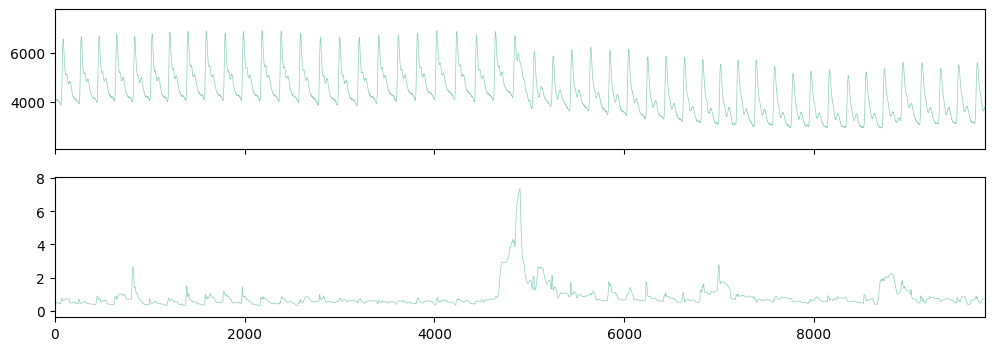

In [4]:
fig, ax = plt.subplots(nrows=2, figsize=(12, 4), sharex=True)
plot_time_domain(x, ax=ax[0])
plot_time_domain(mp, ax=ax[1])

Finally, we find the top motifs.

In [13]:
motif_ind = motifs(
    x,
    mp=mp,
    max_distance=0.5,
    max_motif=5,
    min_neighbours=2,
    max_neighbours=5,
    exclude=0.2,
)

And, plot the motifs and their neighbors.

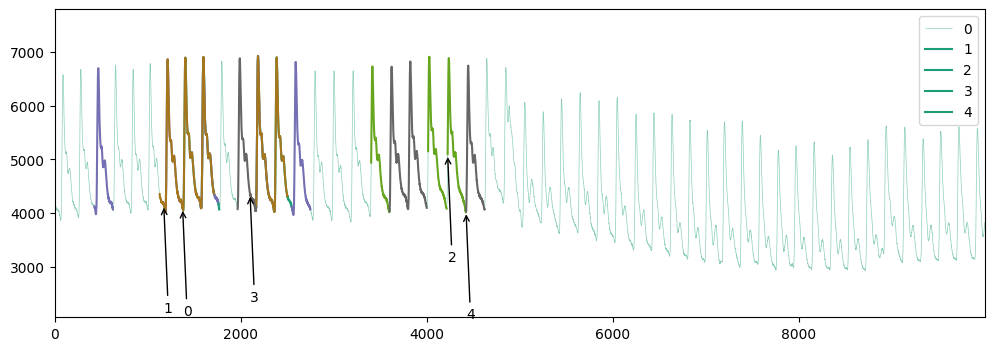

In [34]:
fig, ax = plt.subplots(figsize=(12, 4), sharex=True)
plot_time_domain(x, ax=ax)
cmap = plt.get_cmap("Dark2", 5)
for c, ind in enumerate(motif_ind):
    first = ind[0]
    for i in ind:
        ax.plot(np.arange(i, i + 200), x[i : i + 200], color=cmap(c))
    ax.annotate(f"{c}", xy=(first, x[first]), xytext=(first, x[first] - 2000), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))